## AR estimation of 실업률

##  Import necessary packages

In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_excel
from statsmodels.tsa.stattools import adfuller

##  Read excel data

In [2]:
# 기간: 2000 - 2018
excel_data= read_excel('./연령별_경제활동인구_총괄_20190403.xlsx', '데이터') 
# excel_data= read_excel('c:/연령별_경제활동인구_총괄_20190418164345_A.xlsx', '데이터') 


## 날짜 인덱스

In [3]:
dates = pd.date_range('2000', periods=19, freq='A')
dates

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [10]:
dates = pd.date_range('2012', periods= 8, freq='A')
dates

DatetimeIndex(['2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

## 실업률 추출 (이미 계산된 실업률 사용해도 무방)

In [11]:
data=excel_data.values
data.shape

(21, 690)

In [13]:
urate=[]
for i in range(8):
    urate.append(data[1,7+i*8])
urate

[3.5, 4.2, 3.7, 3.5, 3.1, 3.2, 3.1, 3]

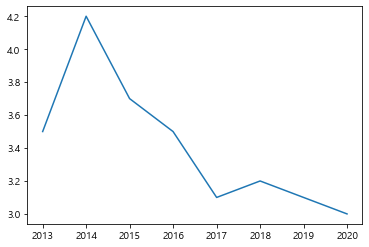

In [14]:
plt.plot(dates, urate)
plt.show()

##  AR regression

In [7]:
model = sm.tsa.ARMA(urate, order=(1, 0))
results=model.fit(method='mle', trend='c')
print(results.summary())          

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   19
Model:                     ARMA(1, 0)   Log Likelihood                  -3.156
Method:                           mle   S.D. of innovations              0.282
Date:                Thu, 29 Sep 2022   AIC                             12.313
Time:                        11:12:05   BIC                             15.146
Sample:                             0   HQIC                            12.792
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2642      0.160     20.400      0.000       2.951       3.578
ar.L1.y        0.6273      0.168      3.733      0.000       0.298       0.957
                                    Roots           

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
